# Nilearn tutorial 2

## 1. Initialization and preparing the data

In [1]:
import nilearn
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline 
import seaborn

### load() and get_data() using nibabel

In [3]:
haxby_ds1 = nib.load('/home/farahana/Documents/dataset/Haxby2001/subj1/bold.nii')
haxby_maskvt_ds1 = nib.load('/home/farahana/Documents/dataset/Haxby2001/subj1/mask4_vt.nii')

### using niftimasker to mask the maskvt into sub1 bold.nii

In [9]:
from nilearn.input_data import NiftiMasker
haxby_maskvt_ds1_mask = NiftiMasker(haxby_maskvt_ds1)
haxby_bold1 = haxby_maskvt_ds1_mask.fit_transform(haxby_ds1)

### get the label or target or stimuli from labels.txt using np.recfromcsv

In [5]:
haxby_label1 = np.recfromcsv('/home/farahana/Documents/dataset/Haxby2001/subj1/labels.txt', delimiter=' ')

In [6]:
# separate the chunks and label
haxby_label1_label = haxby_label1['labels']
haxby_label1_chunks = haxby_label1['chunks']

### print the labels, shape of after niftimasker, shape of the labels

In [10]:
print (haxby_label1_label)
print (haxby_bold1.shape)
print (haxby_label1_label.shape)

[b'rest' b'rest' b'rest' ..., b'rest' b'rest' b'rest']
(1452, 577)
(1452,)


## 2. Building the simple classifier

### Splitting the data into 
    1. Training and test set
    2. cross validate it

In [13]:
from sklearn.cross_validation import train_test_split
haxby_bold1_train, haxby_bold1_test, haxby_label1_train, haxby_label1_test = train_test_split(haxby_bold1, haxby_label1_label, random_state = 30)

In [15]:
from sklearn.cross_validation import cross_val_score, KFold
cv = KFold(n=len(haxby_bold1_train), n_folds=10)

### a) KMeans classifier

In [16]:
from sklearn.cluster import KMeans
np.random.seed(5)
kmeans_clf = KMeans(n_clusters=9 )

In [20]:
fitter = kmeans_clf.fit_predict(haxby_bold1_train)

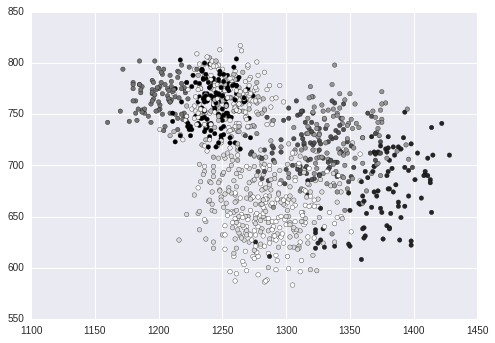

In [23]:
plt.scatter(haxby_bold1_train[:,0], haxby_bold1_train[:,1], c=fitter)

### b) KNN classifier

In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()

In [26]:
knn_clf.fit(haxby_bold1_train, haxby_label1_train)
label1_pred_knn = knn_clf.predict(haxby_bold1_test)

In [29]:
print ("Correct accuracy: ")
print (np.sum(label1_pred_knn == haxby_label1_test)/float(len(haxby_label1_test)))

Correct accuracy: 
0.801652892562


### c) Logistic regression

In [30]:
from sklearn.linear_model import LogisticRegression
logR_clf = LogisticRegression()

In [38]:
logR_clf.fit(haxby_bold1_train, haxby_label1_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [32]:
label1_pred_logR = logR_clf.predict(haxby_bold1_test)
print ("Correct accuracy: ")
print (np.sum(label1_pred_logR == haxby_label1_test)/float(len(haxby_label1_test)))

Correct accuracy: 
0.933884297521


In [33]:
#automatic accuracy calculation for test set
logR_clf.score(haxby_bold1_test, haxby_label1_test)

0.93388429752066116

In [34]:
# we can check accuracy for train set
logR_clf.score(haxby_bold1_train, haxby_label1_train)

1.0

## 3) Using the coefficient(output data from classifiers) for visualizing the output

In [45]:
logR_coef = logR_clf.coef_
print(logR_clf.coef_.shape)

(9, 577)


In [83]:
logR_img_1 = haxby_maskvt_ds1_mask.inverse_transform(logR_coef[0:1,:])
print (logR_img_1.shape)

(40, 64, 64, 1)


In [84]:
logR_img_1.to_filename('haxby_logR_1.nii')

In [85]:
from nilearn.plotting import plot_stat_map, show

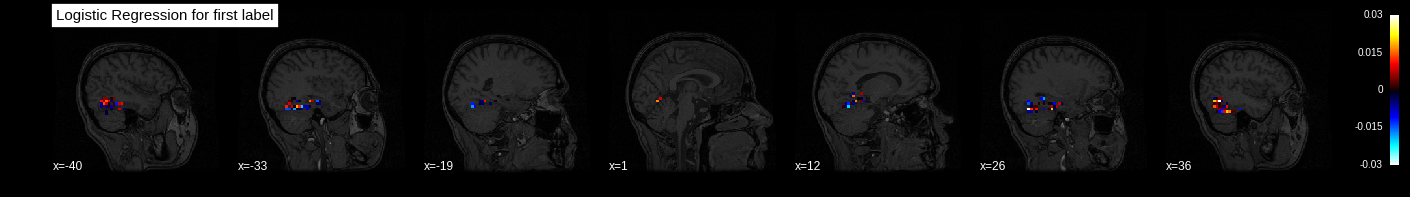

In [86]:
haxby_anat1 = nib.load('/home/farahana/Documents/dataset/Haxby2001/subj1/anat.nii')
plot_stat_map(logR_img_1, bg_img=haxby_anat1, title="Logistic Regression for first label", display_mode="x")

### for second label

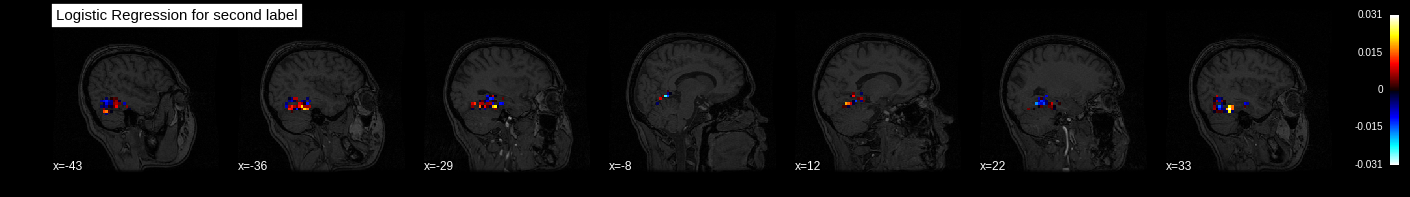

In [87]:
logR_img_2 = haxby_maskvt_ds1_mask.inverse_transform(logR_coef[1:2,:])
plot_stat_map(logR_img_2, bg_img=haxby_anat1, title="Logistic Regression for second label", display_mode="x")